In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Load the data

In [2]:
df_delivery = pd.read_csv('deliveries.csv')
df_match = pd.read_csv('matches.csv')

 ###  Data preprocessing on df_delivery dataset

In [3]:
df_delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [5]:
print(df_delivery.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


-  In df_delivery  columns player_dismissed, dismissal_kind, fielder  has got more null values almost equal to length of the dataset . 
- so creating another dataset with rows of non null values values of these columns as these rows contain data related to player out or dismissal
- And removing these columns from remaining df_delivery dataset
- Also removing duplicates and rows with more than 7 null values

In [6]:
row_with_more_nulls = df_delivery[df_delivery.isnull().sum(axis=1)>7].index
df_delivery = df_delivery.drop(row_with_more_nulls).drop_duplicates()

In [7]:
df_outs = df_delivery[df_delivery['player_dismissed'].notna()]

In [8]:
rows_with_player_dismissed = df_delivery[~df_delivery['player_dismissed'].isna()].index

In [9]:
df_delivery = df_delivery.drop(rows_with_player_dismissed)

In [10]:
# fielder non null values also got covered up in  df_outs

In [11]:
df_delivery.shape

(170221, 21)

In [12]:
df_outs.shape

(8834, 21)

In [13]:
df_outs[df_outs['fielder'].isna()].dismissal_kind.unique()

array(['bowled', 'lbw', 'caught and bowled', 'retired hurt', 'hit wicket',
       'obstructing the field', 'run out', 'caught', 'stumped'],
      dtype=object)

- In df_outs null values are present in 'fielder' column which is for dismissal_kind as below
- ['bowled', 'lbw', 'caught and bowled', 'retired hurt', 'hit wicket']

In [14]:
df_delivery.isnull().sum()  # in df_match 'player_dismissed' , 'dismissal_kind' , 'fielder'  columns can be removed

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             170221
dtype: int64

In [15]:
df_delivery = df_delivery.drop(['player_dismissed', 'dismissal_kind', 'fielder'], axis=1)

In [16]:
df_delivery.isnull().any()

match_id         False
inning           False
batting_team     False
bowling_team     False
over             False
ball             False
batsman          False
non_striker      False
bowler           False
is_super_over    False
wide_runs        False
bye_runs         False
legbye_runs      False
noball_runs      False
penalty_runs     False
batsman_runs     False
extra_runs       False
total_runs       False
dtype: bool

- Till now missing values were handles for df_delivery and dtypes does not seem to have any problem for now
- now lets look for  df_match

### Data preprocessing on df_match dataset

In [17]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [18]:
df_match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [19]:
print(df_match.isnull().sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


- **Handling Missing values in city**

In [20]:
df_match[df_match.city.isna()].venue.unique()

array(['Dubai International Cricket Stadium'], dtype=object)

In [21]:
df_match['city'].fillna('Dubai' , inplace = True)

In [22]:
df_match['city'].isnull().sum()

0

- **Correcting venue as there will be cardinality issue in future**

In [23]:
df_match.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [24]:
venue_replace_dict = {'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium',
                'IS Bindra Stadium' : 'Punjab Cricket Association Stadium',
                'ACA-VDCA Stadium': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
                'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                'Punjab Cricket Association Stadium, Mohali' :'Punjab Cricket Association Stadium',
                'MA Chidambaram Stadium, Chepauk' : 'MA Chidambaram Stadium',
                'Sardar Patel Stadium, Motera':'Sardar Patel Stadium',
                 'Vidarbha Cricket Association Stadium, Jamtha':'Vidarbha Cricket Association Stadium',
                'M. A. Chidambaram Stadium':'MA Chidambaram Stadium',
                'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                }

In [25]:
df_match['venue'].replace(venue_replace_dict, inplace=True)

- **Correcting team names properly in both datasets**

In [26]:
df_match.info() # team1 , team2 , toss_winner , winner

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [27]:
df_delivery.info() # batting_team    # bowling_team

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170221 entries, 0 to 179076
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   match_id       170221 non-null  int64 
 1   inning         170221 non-null  int64 
 2   batting_team   170221 non-null  object
 3   bowling_team   170221 non-null  object
 4   over           170221 non-null  int64 
 5   ball           170221 non-null  int64 
 6   batsman        170221 non-null  object
 7   non_striker    170221 non-null  object
 8   bowler         170221 non-null  object
 9   is_super_over  170221 non-null  int64 
 10  wide_runs      170221 non-null  int64 
 11  bye_runs       170221 non-null  int64 
 12  legbye_runs    170221 non-null  int64 
 13  noball_runs    170221 non-null  int64 
 14  penalty_runs   170221 non-null  int64 
 15  batsman_runs   170221 non-null  int64 
 16  extra_runs     170221 non-null  int64 
 17  total_runs     170221 non-null  int64 
dtypes: i

In [28]:
df_delivery.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [29]:
df_delivery.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [30]:
df_match['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [31]:
team_name_replace_dict =  {'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Pune Warriors': 'Rising Pune Supergiants',
    'Rising Pune Supergiant': 'Rising Pune Supergiants'}

In [32]:
df_delivery.replace({'batting_team': team_name_replace_dict, 'bowling_team': team_name_replace_dict}, inplace=True)
df_outs.replace({'batting_team': team_name_replace_dict, 'bowling_team': team_name_replace_dict}, inplace=True)
df_match.replace({'team1': team_name_replace_dict, 'team2': team_name_replace_dict, 'toss_winner': team_name_replace_dict, 'winner': team_name_replace_dict}, inplace=True)

- **Tried to handle missing values in 'player_of_match' but as checked found out that the matches are ' no result ' . So removed the rows with player of match null values**

In [33]:
df_match[df_match.player_of_match.isnull()].id.unique()

array([  301,   546,   571, 11340], dtype=int64)

In [34]:
# Fill missing 'player_of_match' values based on the maximum runs scored by a striker in the corresponding match
for match_id in df_match.loc[df_match['player_of_match'].isnull(), 'id']:
    mask = df_delivery['match_id'].isin([match_id])

    if not df_delivery.loc[mask].empty:
        max_runs_striker = df_delivery.loc[mask].groupby('batsman')['batsman_runs'].sum().idxmax()
        df_match.loc[df_match['id'] == match_id, 'player_of_match'] = max_runs_striker
    else:
        # Handle the case where there are no runs recorded for any striker in the match
        # You can choose an appropriate default or leave it as NaN
        df_match.loc[df_match['id'] == match_id, 'player_of_match'] = np.nan

In [35]:
df_delivery[df_delivery.match_id.isin(df_match[df_match.player_of_match.isnull()].id.unique())]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs


In [36]:
df_match[df_match.player_of_match.isnull()]
# for these matches there are no rows in df_delivery also these are no result matched so these can be removed

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [37]:
df_match.shape

(756, 18)

In [38]:
df_match = df_match[~df_match.player_of_match.isnull()]

In [39]:
df_match.shape

(756, 18)

In [40]:
df_match.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [41]:
# umpire3 column can be removed as there are more null values > 50 %
df_match.drop(columns=['umpire3'],axis = 1,inplace=True)

In [42]:
df_match.shape

(756, 17)

In [43]:
df_match[['umpire1','umpire2']]

,umpire1,umpire2
0,AY Dandekar,NJ Llong
1,A Nand Kishore,S Ravi
2,Nitin Menon,CK Nandan
3,AK Chaudhary,C Shamshuddin
4,NaN,NaN
...,...,...
751,Nanda Kishore,O Nandan
752,Nigel Llong,Nitin Menon
753,NaN,NaN
754,Sundaram Ravi,Bruce Oxenford


In [44]:
df_match[df_match['umpire2'].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,NaN,NaN


In [45]:
df_umpires_missing_rows = df_match[df_match['umpire1'].isna() | df_match['umpire2'].isna()]

In [46]:
df_umpires_missing_rows

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,NaN,NaN


In [47]:
df_match.drop(df_umpires_missing_rows.index,inplace = True)

In [48]:
df_match.shape

(754, 17)

### checking shapes of df_match , df_delivery  along with newly separated datasets df_umpires_missing_rows , df_outs

In [49]:
df_match.shape

(754, 17)

In [50]:
df_delivery.shape

(170221, 18)

In [51]:
df_outs.shape  

# player dismissed cases ... whether caught, bowled .. etc .
# separated from df_delivery

(8834, 21)

In [52]:
df_umpires_missing_rows.shape 

# with umpires 1 , 2 missing .. 2 rows .. no right way found to fill so placed in other dataframe
# separated from df_match

(2, 17)

In [53]:
df_match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [54]:
df_delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object')

In [55]:
df_merged =  pd.merge(df_match,df_delivery, left_on='id', right_on='match_id', how='inner')

In [56]:
df_merged.shape

(169752, 35)

In [57]:
df_match.groupby(by='city')['season'].nunique().sort_values(ascending=False)
# Mumbai , Delhi , Kolkata -- hosted 11 seasons  ( maximum )

city
Mumbai            11
Kolkata           11
Delhi             11
Hyderabad         10
Bangalore          9
Chandigarh         9
Chennai            8
Jaipur             7
Pune               6
Visakhapatnam      4
Dharamsala         4
Ranchi             3
Raipur             3
Ahmedabad          3
Indore             3
Cuttack            3
Bengaluru          2
Kanpur             2
Rajkot             2
Mohali             2
East London        1
Port Elizabeth     1
Sharjah            1
Bloemfontein       1
Cape Town          1
Centurion          1
Nagpur             1
Durban             1
Kochi              1
Kimberley          1
Johannesburg       1
Dubai              1
Abu Dhabi          1
Name: season, dtype: int64

In [58]:
df_match.date = pd.to_datetime(df_match.date)

In [59]:
df_match.season.value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2015    59
2019    59
2017    58
2008    58
2009    57
Name: season, dtype: int64

In [60]:
df_match.shape

(754, 17)

In [61]:
df_match[df_match['season']==2011][df_match['winner']=='Mumbai Indians'].shape

# number of matches won by Mumbai Indians in 2011 year or season

C:\Users\HP\AppData\Local\Temp\ipykernel_8164\3369510130.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_match[df_match['season']==2011][df_match['winner']=='Mumbai Indians'].shape


(10, 17)

In [62]:
df_match.toss_decision

0      field
1      field
2      field
3      field
5      field
       ...  
750    field
751    field
752      bat
754    field
755      bat
Name: toss_decision, Length: 754, dtype: object

In [63]:
df_match.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [64]:
df_match.toss_decision.value_counts()/1000  

# percentage of toss decision 

field    0.462
bat      0.292
Name: toss_decision, dtype: float64

In [65]:
x = df_match[['toss_winner','toss_decision','winner']]

In [66]:
x[x.toss_winner==x.winner]['toss_decision'].value_counts() 

# no. of toss decisions while toss winner won the match

field    258
bat      133
Name: toss_decision, dtype: int64

In [67]:
x[x.toss_winner!=x.winner]['toss_decision'].value_counts()

# no. of toss decisions while toss winner lost the match

field    204
bat      159
Name: toss_decision, dtype: int64

In [68]:
y = df_match[df_match.toss_winner==df_match.winner][df_match.toss_decision=='field']

# toss winner choosing fielding first batting second

C:\Users\HP\AppData\Local\Temp\ipykernel_8164\1091775322.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = df_match[df_match.toss_winner==df_match.winner][df_match.toss_decision=='field']


In [69]:
y.season.value_counts()

2016    32
2019    30
2017    28
2011    27
2018    27
2014    24
2008    19
2012    18
2013    15
2009    14
2015    14
2010    10
Name: season, dtype: int64

In [70]:
match_ids_2019 = df_match[df_match.season==2019].id

In [71]:
match_ids_2019 = list(match_ids_2019)

In [72]:
print(match_ids_2019)  # matches played in 2019 season

[11137, 11138, 11139, 11140, 11141, 11142, 11143, 11144, 11145, 11146, 11147, 11148, 11149, 11150, 11151, 11152, 11153, 11309, 11310, 11311, 11312, 11313, 11314, 11315, 11316, 11317, 11318, 11319, 11320, 11321, 11322, 11323, 11324, 11325, 11326, 11327, 11328, 11329, 11330, 11331, 11332, 11333, 11334, 11335, 11336, 11337, 11338, 11339, 11340, 11341, 11342, 11343, 11344, 11345, 11346, 11347, 11412, 11414, 11415]


In [73]:
df_delivery[df_delivery.batsman_runs.isin([4,6])].match_id.nunique()

756

## EDA

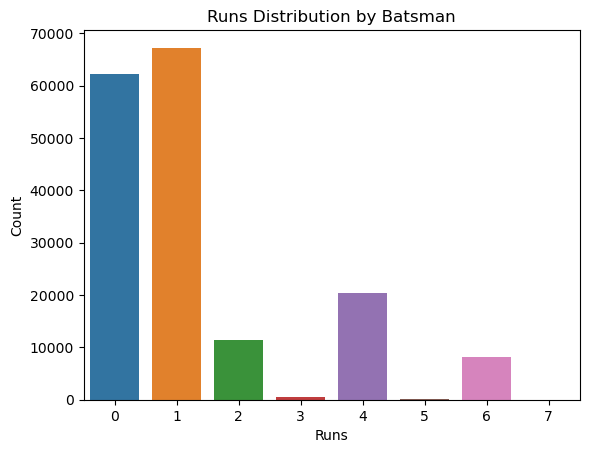

In [74]:
# count plot on runs distribution 
# single runs and 0 or dot balls are higher 
# and they are followed by 4 , 2 , 6  runs 

sns.countplot(x='batsman_runs', data=df_delivery)
plt.title('Runs Distribution by Batsman')
plt.xlabel('Runs')
plt.ylabel('Count')
plt.show()

In [75]:
df_outs.dismissal_kind.unique()

array(['caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

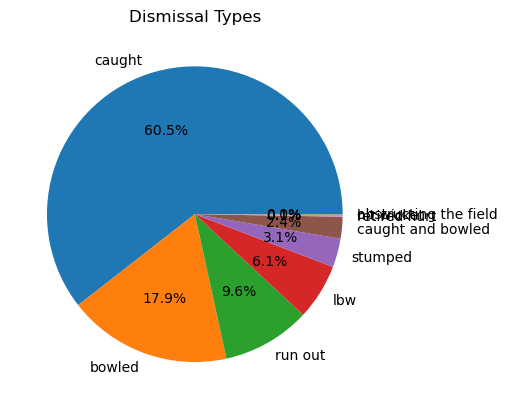

In [76]:
# analysing only the balls where outs or dismissals happened
# More dismissals happened by caught .. fielder making a catch
# followed by bowled which is ball hitting the wickets directly and run out


df_outs['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Dismissal Types')
plt.ylabel('')
plt.show()

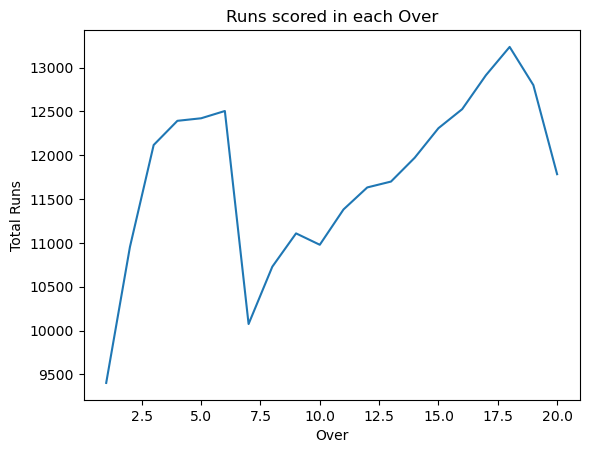

In [77]:
# estimating runs made in each over considering the entire dataset irrespective of season

df_delivery.groupby('over')['total_runs'].sum().plot()
plt.title('Runs scored in each Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.show()

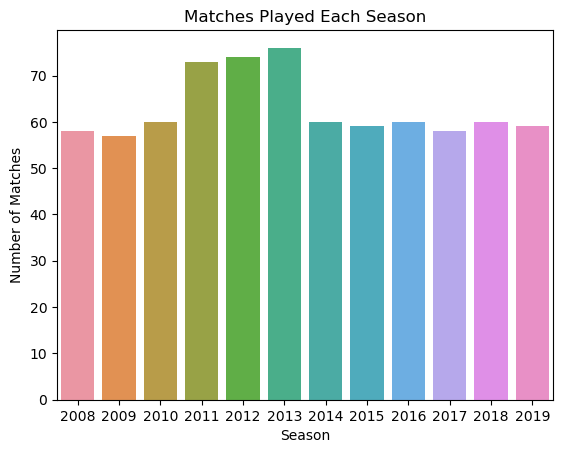

In [78]:
# Number of matches played each season is displayed in below graph

sns.countplot(x='season', data=df_match)
plt.title('Matches Played Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.show()

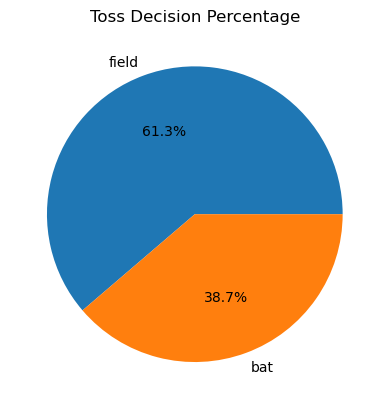

In [79]:
# Percentage of toss decisions which are field or bat 
# In most cases field is chosen

df_match['toss_decision'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Toss Decision Percentage')
plt.ylabel('')
plt.show()

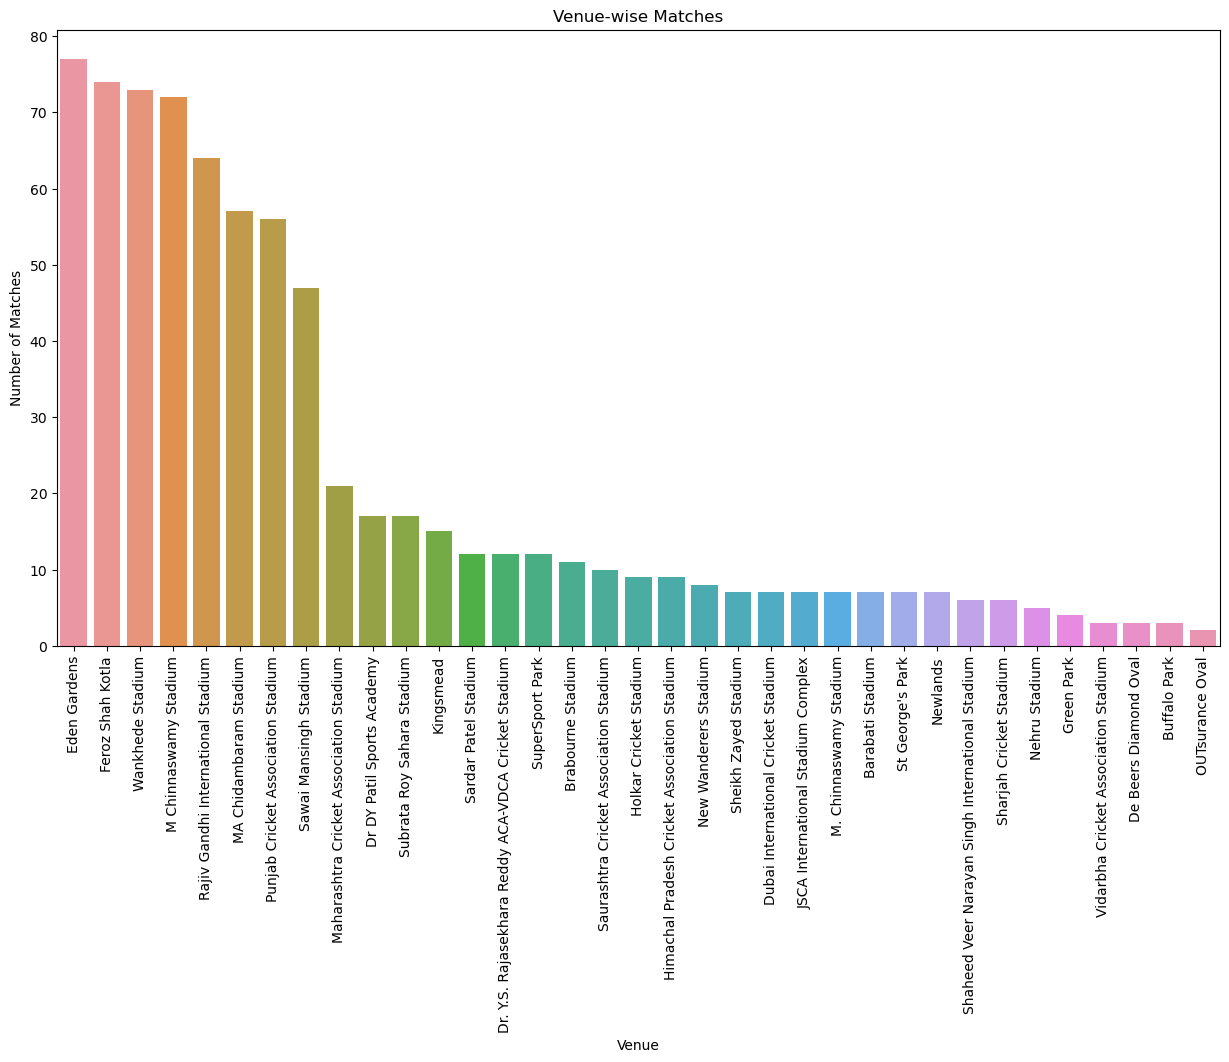

In [80]:
# comparing the number of matches played venue wise 
# As seen from below graph there are almost 8 venues which have higher number of matches held
# out of all Eden Gardens tops the list

plt.figure(figsize=(15, 8))
sns.countplot(x='venue', data=df_match, order=df_match['venue'].value_counts().index)
plt.title('Venue-wise Matches')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

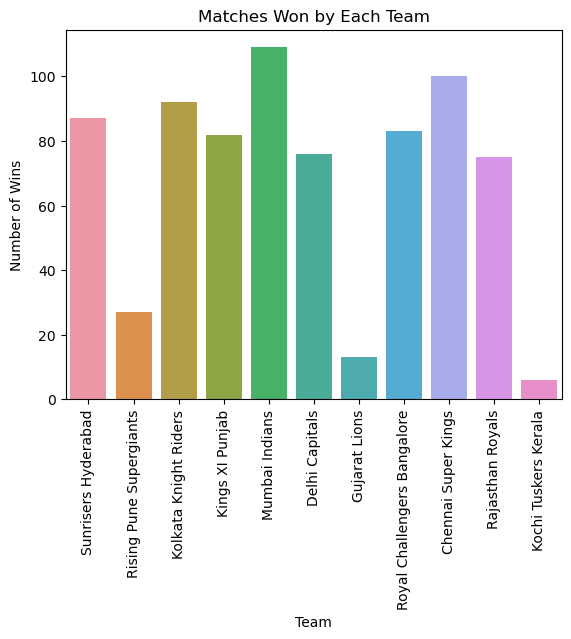

In [81]:
# Counting the matches won by each team
# Mumbai Indians won the highest number of matches combining all seasons

sns.countplot(x='winner', data=df_match)
plt.title('Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

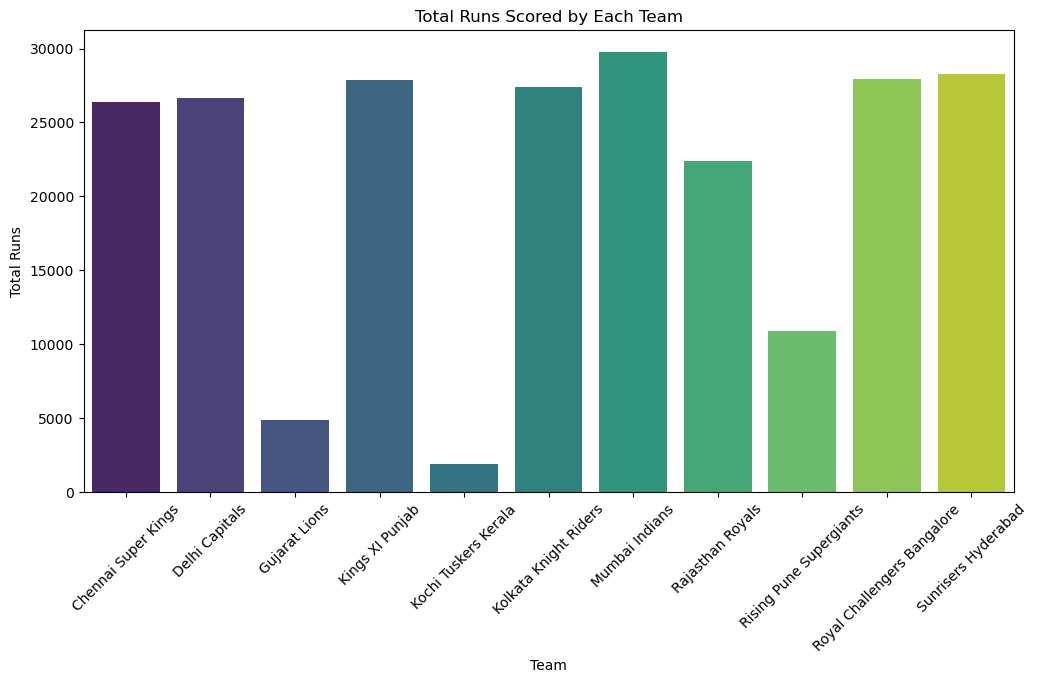

In [82]:
## Total runs scored by each team in all the seasons combined

# Merge datasets on 'match_id'
df_combined = pd.merge(df_delivery, df_match, left_on='match_id', right_on='id', how='inner')

# Calculate total runs scored by each team
total_runs_by_team = df_combined.groupby('batting_team')['total_runs'].sum().reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='batting_team', y='total_runs', data=total_runs_by_team, palette='viridis')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

In [83]:
df_delivery.drop(columns=['penalty_runs'],axis=1,inplace=True)  # as all values are zero in it

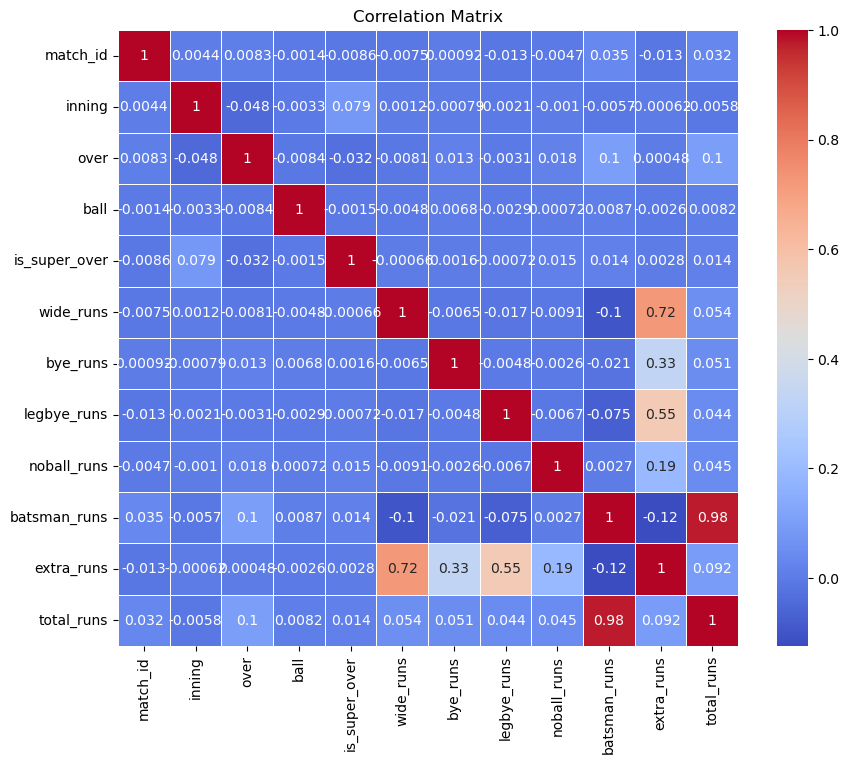

In [84]:
correlation_matrix = df_delivery.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

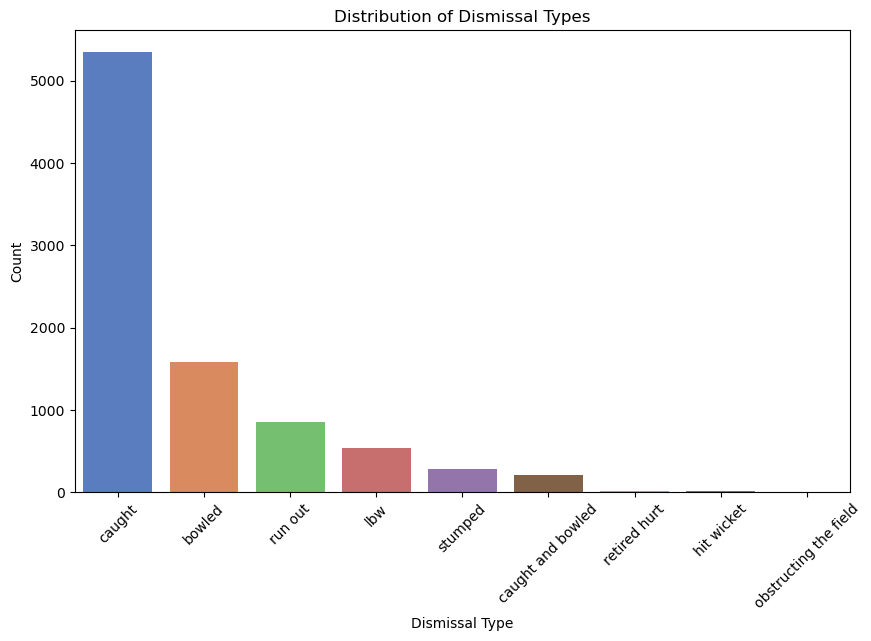

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(x='dismissal_kind', data=df_outs, order=df_outs['dismissal_kind'].value_counts().index, palette='muted')
plt.title('Distribution of Dismissal Types')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### CONCLUSION :

-  Clearly as seen from above analysis the effect of features provided does not seem that great because there are many other circumstances .  But Major takeaways that can be taken are 'Mumbai Indians' are the ones who won more number of matches . Also there are some teams closer to Mumbai Indians
-  Also More dismissals or outs happened due to catches which under category 'caught'
-  Teams who won toss were mostly willing to opt for fielding first than batting
-  Winning rate is not that depending on toss decision by toss winners 
-  Also there are some popular venues  were more matched were played . Eden Gardens tops the list

##### Some points from core knowledge :

- Here there were some less no. missing values that are not disturbed but separated which are 'fielder' feature in df_outs and umpire1 and umpire2 in df_umpires_missing_rows .  This was done because 'fielder' feature is null for categories like bowled , caught and bowled ,... etc kind of dismissals . So didn't touch them to not lose information . In future they can be replaced with some applicable value . And in umpire there is no relation betweeen any other features to fill then also cant do forward and backward fill as the matches are always not same  , So just separated them .


#### Model building scope :

-  Some key future ways do build models from these kind of datasets is first of all mostly label encoders are needed for analysing this data and models like Decision Tree , logistic regression , SVM .. can be used depending upon the problem statement and checked for performance 
-  But there might be chances of not having great performance from model but using some optimisations and hyperparameter tunings some good performances might also can be achieved .
